<a href="https://colab.research.google.com/github/fmWaithaka/helloWorld/blob/main/Scikit_Learn_Fundermentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-learn Fundermentals

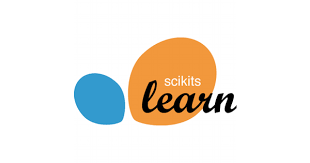

## 1.0 What is Scikit-learn

[Getting Started in their Official Website](https://scikit-learn.org/stable/getting_started.html)

`Scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities

`Scikit-learn` offers extensive support for the development of machine learning models. In this demo, we will explore a subset of these capabilities since we can't fully explore them in one sitting.


Machine learning involves the use of algorithms and statistical models to enable computers to carry out specific tasks without explicit instructions, relying on patterns and inference instead. It is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.

While your definition captures some aspects of it, it is a simplified interpretation. Machine learning involves more than just identifying patterns; it also includes the ability to make decisions and predictions based on the patterns identified in the data. The models are trained on historical data to make predictions or decisions when new data is provided. It's a broader concept that encompasses various techniques and methods for data analysis and pattern recognition

### 1.1 Stages of machine learning

**Machine learning**, in my defination, involve the use of algorithms and statictical models on your data to enable computers to carry out specific tasks without explicit instructions, relying on patterns and inferences from the data instead.

This specific tasks can be decision making or prediction.

So how does `scikit-learn` library help us in developing the machine learning model? Here are the stages involve in machine learning model development:-
> 1. **Problem Statement** - The first thing you need is to define the problem statement clearly
2. **Data Availability** - If you are getting started and don't have any dummy data to practice with, then scikit-learn got you covered. It provide several datasets that can be used for practice, experimentation, and testing machine learning models.
3. **Data preprocessing:** Scikit-learn provides various tools for data preprocessing, such as data normalization, encoding categorical variables, and handling missing values.
4. **Model selection:** The library offers tools for selecting the appropriate model for a given task, based on the characteristics of the data and the problem at hand.
5. **Model training and fitting:** Scikit-learn includes a wide range of machine learning algorithms for both supervised and unsupervised learning tasks, making it easier to train and fit models to the data.
6. **Model evaluation:** The library provides functions for evaluating model performance, including metrics for classification, regression, and clustering tasks.
7. **Deployment:** While scikit-learn focuses primarily on the development and evaluation of models, it also aids in model serialization, which can be crucial for model deployment in production environments.

![picture](https://ucarecdn.com/f67c8827-cc1b-478b-9e20-8648e1b8ca5a/)

We will try and explore `scikit-learn` in the development of a machine learning model.

## 2.0 Get a hands-on experience with Scikit-learn library

We first import the required libraries but first lets understand the problem statement.

Note: *Since I am using colab there is no need to install them because they come pre-installed. But for other editor like jupyter notebook you'll require to install fist using the `pip` install command*

### 2.1 Problem statement

In this demo we will look at classification problem. A classification problem involves predicting whether something is one thing or another. eg an email is a spam or not.

Classification, along with regression is one of the most common types of machine learning problems.

This is what we are going to work on in this notebook, taking a set of inputs and predicting what class those set of input belong to.

### 2.2 Make some classification data and get ready

We'll use the `make_circles()` method from Scikit-Learn to generate two circles with different coloured dots.

The machine learning problem we need to solve in the `make-circle` scikit-learn dataset is a classification problem. We need to train a machine learning model to predict the class of a new data point based on its features.

**Data**

The make-circle scikit-learn dataset is a synthetic dataset that consists of two classes of data points. The data points are arranged in two circles, with one class of data points in the inner circle and the other class of data points in the outer circle.

**Features**

The features of the make-circle scikit-learn dataset are the x-coordinate and y-coordinate of each data point.

**Target**

The target variable of the make-circle scikit-learn dataset is the class of each data point. The classes are labeled 0 and 1, with 0 representing the inner circle and 1 representing the outer circle.

In [2]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

Let's view the firs 5 `x` and `y` values

In [3]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


Look's like there's two `X` values per one `y` value.

Let's explore the data further.

In [4]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0



It looks like each pair of X features (X1 and X2) has a label (y) value of either 0 or 1.

This tells us that our problem is binary classification since there's only two options (0 or 1).

In [ ]:
# How many values are there in each class
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

500 each, nice and balanced

Let's plot them. It's always good to visualize your data

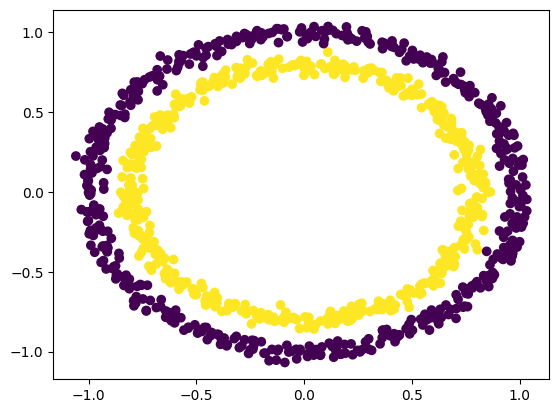

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.viridis);

Alright, looks like we've got a problem to solve.

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))


Looks like we've got a match on the first dimension of each.

There's 1000 X and 1000 y.

But what's the second dimension on X?

It often helps to view the values and shapes of a single sample (features and labels).

Doing so will help you understand what input and output shapes you'd be expecting from your model.

In [6]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 2.3 Data preprocessing


In this stage we are going to split our data into train and test split sing `sklearn`

In [12]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)


Nice! Looks like we've now got 800 training samples and 200 testing samples.

### 2.4 Model Selection

The process of model selection involves choosing the most appropriate classifier that can effectively handle the linear or non-linear relation of our data.

As we observed from above the dataset is non-linear. So the model we are going to use should consider classifiers capable of capturing complex, non-linear relationships. But we can as well see if there exist a linear relationship.

Some suitable models for this dataset may include Logistic regression, decision trees, random forests, and other ensemble methods.

In this demo we are going to explore Logist regression as our choice of the model since it is simple and quite popular.It aims to model the probability of a binary outcome (e.g., win/lose, sick/healthy, pass/fail) based on one or more predictor variables (features).

### 2.5 Model training and fitting

In [7]:
# Import necessesary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression

In [10]:
# create a logistic regression model
classifier = LogisticRegression(random_state=1)

In [13]:
# Train the logistic regression model on the training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### 2.5 Model evaluation

We have already train our data, let's now make predictions

In [15]:
# make prediction on the test data
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import classification_report  # Import the classification_report function

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       100
           1       0.46      0.50      0.48       100

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200



In the context of the classification report:

- **Precision:** This is the ratio of correctly predicted positive observations to the total predicted positive observations. In the context of the values provided, for class 0, the precision is 0.46, indicating that 46% of the data points predicted as class 0 are actually of class 0. Similarly, for class 1, the precision is 0.46, indicating that 46% of the data points predicted as class 1 are actually of class 1.

- **Recall:** This is the ratio of correctly predicted positive observations to all observations in the actual class. In the provided values, for class 0, the recall is 0.42, suggesting that 42% of the actual class 0 data points were correctly predicted as class 0. For class 1, the recall is 0.50, indicating that 50% of the actual class 1 data points were correctly predicted as class 1.

- **F1-score:** This is the harmonic mean of precision and recall. It provides a balance between precision and recall, particularly useful when dealing with uneven class distribution. In the given values, the F1-score for class 0 is 0.44, and for class 1, it is 0.48.

- **Support:** This is the number of occurrences of each class in the actual dataset. In this case, there are 100 instances of each class (0 and 1).

- **Accuracy:** This is the ratio of correctly predicted observations to the total observations, providing an overall measure of how often the classifier is correct. In this instance, the overall accuracy of the model is 0.46 or 46%.

- **Macro avg:** This is the average of precision, recall, and F1-score across all the classes, giving each class an equal weight.

- **Weighted avg:** This is the weighted average of precision, recall, and F1-score, where each metric is calculated with respect to how many true instances there are for each label.

The overall accuracy of the model is 46%, suggesting that the model's performance is modest and has room for improvement.

In [17]:
def plot_decision_boundary(model, X, y):
    # Create a mesh grid
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Logistic Regression Model')
    plt.show()

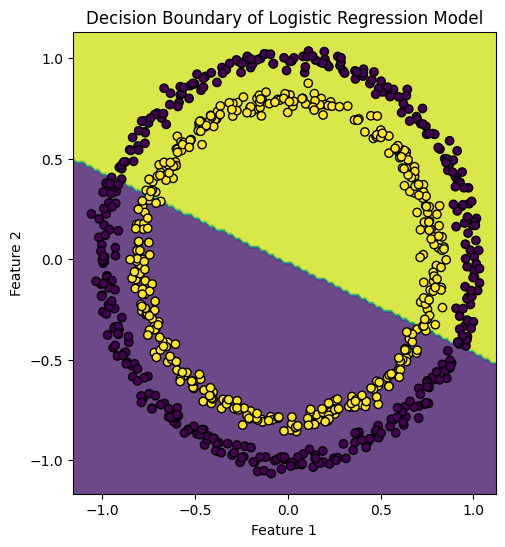

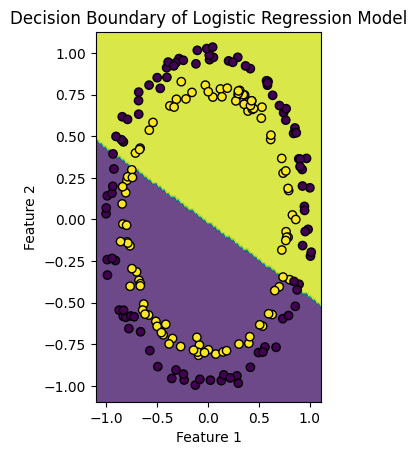

In [18]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train - Logistic Regression Model")
plot_decision_boundary(classifier, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test - Logistic Regression Model")
plot_decision_boundary(classifier, X_test, y_test)


Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line...

That explains the 46% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is **underfitting**, meaning it's not learning predictive patterns from the data.

Here is why:

**Logistic regression** is commonly used for binary classification tasks in which the relationship between the features and the target variable is assumed to be linear.

How could we improve this?

> * **Increase the amount of training data.** Logistic regression models are data-driven, so the more training data you have, the better the model will perform.
* **Use regularization.** Regularization is a technique that can help to prevent overfitting. There are two main types of regularization: L1 regularization and L2 regularization. L1 regularization penalizes the absolute value of the model coefficients, while L2 regularization penalizes the square of the model coefficients. You can try using different values of L1 and L2 regularization to see which one works best for your data.
* **Tune the hyperparameters of the model.** Logistic regression models have a number of hyperparameters that can be tuned to improve the model's performance. Some of the most important hyperparameters include the learning rate and the number of epochs. You can use grid search or random search to tune the hyperparameters of your model.
* **Use a different machine learning algorithm.** Logistic regression is a simple but effective machine learning algorithm. However, there are other machine learning algorithms that may perform better on your data. Some other algorithms you can try include support vector machines (SVMs), decision trees, random forests, and neural networks.

Let's try to use a different machine learning algorithm such as Random Forest.

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

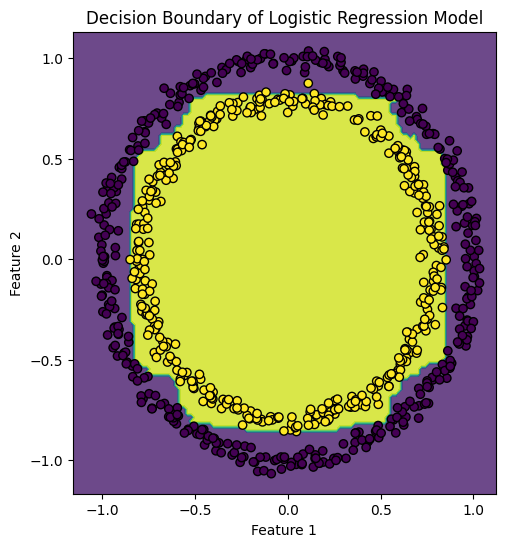

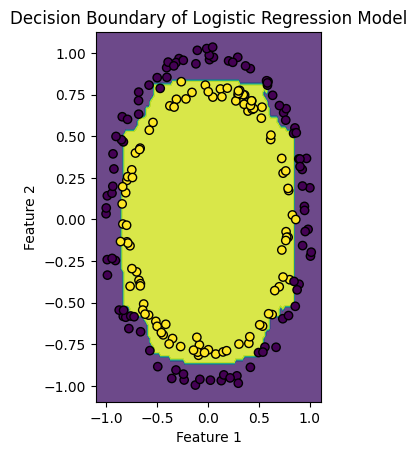

In [20]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train - Logistic Regression Model")
plot_decision_boundary(clf, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test - Logistic Regression Model")
plot_decision_boundary(clf, X_test, y_test)

In [21]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

print('Accuracy:', accuracy)


Accuracy: 0.98


Wow, nice!!! This is a huge implovement, but we can still try another model maybe this time we will get an accuracy of 1.0

Lets try Vector Support Machine

In [22]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', random_state=1)

clf.fit(X_train, y_train)


SVC(random_state=1)

In [23]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

print('Accuracy:', accuracy)


Accuracy: 1.0


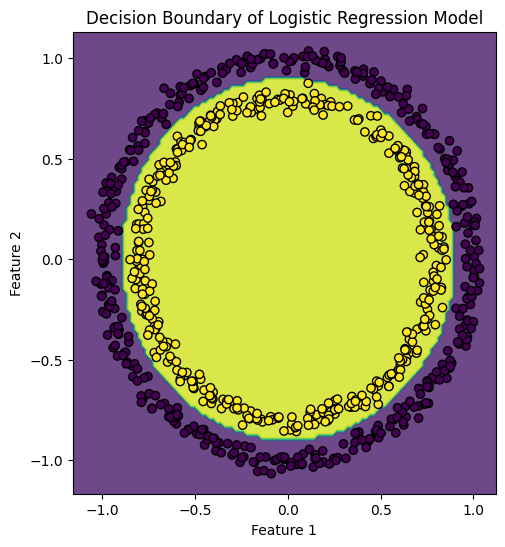

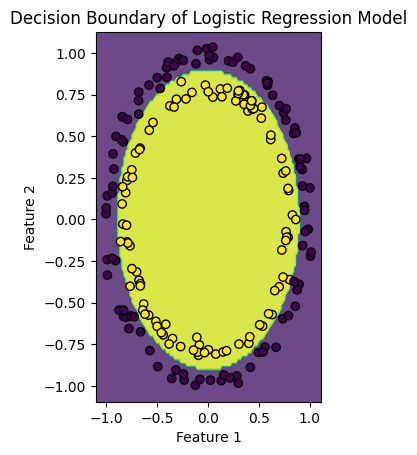

In [24]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train - Logistic Regression Model")
plot_decision_boundary(clf, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test - Logistic Regression Model")
plot_decision_boundary(clf, X_test, y_test)

Perfect!! We did it. "We have achieved a remarkable milestone with a 100% accuracy score. Our choice of the Support Vector Machine (SVM) for this specific dataset has proven to be effective.

Here is why :

A **support vector machine (SVM)** is a supervised learning model that can be used for both classification and regression tasks. SVMs work by finding a hyperplane that best separates the data into two classes. The hyperplane is a line or curve in n-dimensional space that divides the data into two regions, one for each class.

That is why it's best suit for our data.

## Conclusion

In this exploration of the Scikit-learn library, we successfully leveraged a practice dataset for comprehensive hands-on experience. Through the stages of data preprocessing, model training, and evaluation, we utilized various models available in the Scikit-learn library, including Logistic Regression, Random Forest and Support Vector Machines, to address the classification task at hand.

While Scikit-learn proved to be a robust and versatile tool, it is essential to acknowledge some of its limitations. One such limitation is its focus on traditional machine learning models, which may not suffice for handling extremely complex or large-scale deep learning tasks. Additionally, Scikit-learn's performance might be constrained in scenarios where datasets require specialized preprocessing or when dealing with unstructured data like images, text, or time-series data.

Despite these limitations, Scikit-learn remains a powerful and user-friendly library for a wide range of machine learning applications. Its simplicity, extensive documentation, and the vast collection of tools and models make it an excellent choice for practitioners and researchers aiming to implement and experiment with machine learning algorithms effectively